# UK Ultimate assured lifetables
Male, 1991-1994

In [3]:
import pandas as pd
lifetable = 'Python AM92.xlsx'
LIFETABLE = pd.read_excel (lifetable)

# lx
def l(x):
    x = x-17
    c = LIFETABLE.iloc[x]['l']
    return c

# dx
def d(x):
    x = x-17
    c = LIFETABLE.iloc[x]['d']
    return c

# tPx
def p(x,t = 1):
    c = l(x+t)/l(x)
    return c

# tQx
def q(x, t = 1, s = 0):
    c = (l(x+s)-l(x+t+s))/l(x)
    return c

# Life expectancy (x)
def e(x):
    x = x-17
    c = LIFETABLE.iloc[x]['e']
    return float(c)

#UDD Assumption formulae
def UDD_l(x):
    t = float(x) - int(x) 
    c = (1-t)*l(int(x))+t*l(int(x)+1)
    return c

def UDD_p(x,t=1):
    a = UDD_l(x+t)/UDD_l(x)
    return a

def UDD_q(x, t=1, s=0):
    a = (UDD_l(x+t+s)-UDD_l(x+t+s+1))/UDD_l(x)
    #I'm not certain t and s works (i.e. t|s qx) 
    return a

#CFM Assumption formulae
def CFM_l(x):
    t = float(x) - int(x) 
    c = l(int(x))**(1-t)*l(int(x)+1)**t
    return c

def CFM_p(x,t=1):
    a = CFM_l(x+t)/CFM_l(x)
    return a

def CFM_q(x, t=1, s=0):
    #haven't tested this whole formula
    a = (CFM_l(x+t+s)-CFM_l(x+t+s+1))/CFM_l(x)
    return a

LIFETABLE.head()

,x,l,d,q,p,mu,e
0,17,10000.000000,6.000000,0.000600,0.999400,0.000603,61.339184
1,18,9994.000000,5.936436,0.000594,0.999406,0.000597,60.376010
2,19,9988.063564,5.862993,0.000587,0.999413,0.000591,59.411894
3,20,9982.200571,5.809641,0.000582,0.999418,0.000585,58.446789
4,21,9976.390930,5.756378,0.000577,0.999423,0.000580,57.480825


## Test

In [4]:
age = int(input('how old is your friend? '))
print(LIFETABLE.iloc[age-17]['x'], 'years old')
print(l(age), 'living') 
print(d(age), 'will die')
print(q(age), 'q') 
print(p(age), 'p') 
print(LIFETABLE.iloc[age-17]['mu'], 'force of death')
print('+',e(age), 'life expectancy')

p(age)

how old is your friend? 20
20.0 years old
9982.200570687932 living
5.809640732140377 will die
0.0005820000000000531 q
0.9994179999999999 p
0.000585 force of death
+ 58.44678949860571 life expectancy


0.9994179999999999

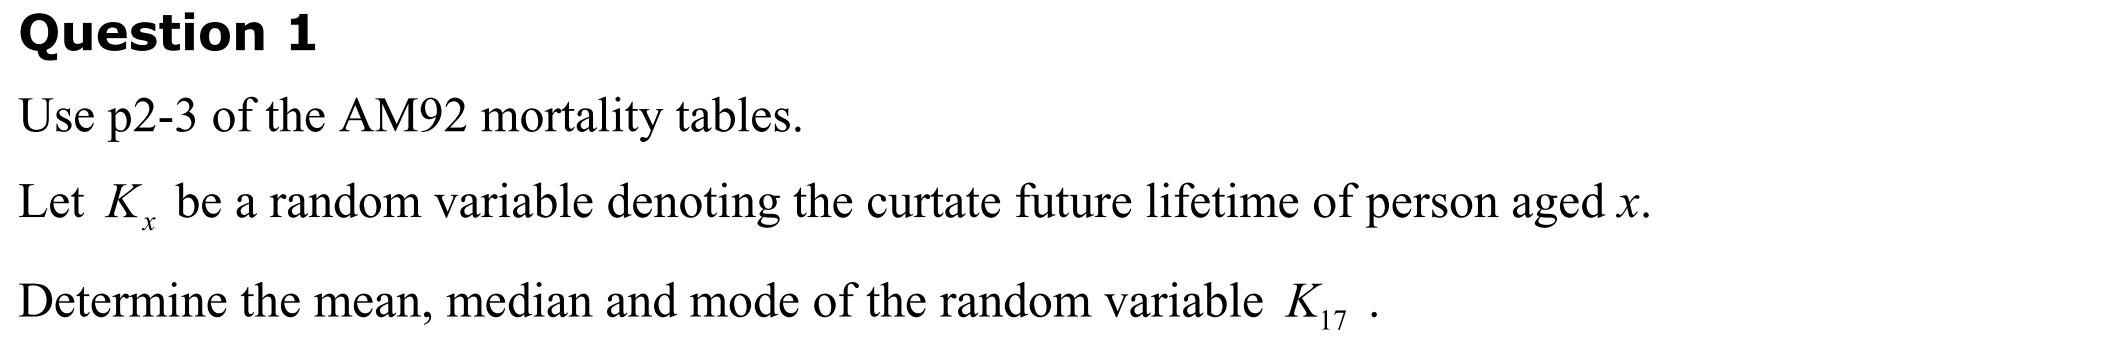

In [5]:
# P(Kx = k) = k|qx = kPx * q(x+k)
#x = int(input('Age: '))
x = 17
i = 0
SUM = 0
while (x+i) in LIFETABLE['x']:
    SUM += p(x,i)
    i += 1
    
print('the mean is the curtate life expectancy')
print('first princ = ',SUM, 'where does the rounding error come from?')
print('formula     = ',e(x), 'answer')

the mean is the curtate life expectancy
first princ =  62.33643496281776 where does the rounding error come from?
formula     =  61.33918396225473 answer


In [6]:
x = 17
i = 0
SUM = 0
while (x+i) in LIFETABLE['x'] and SUM < 0.5:
    SUM += p(x,i)*q(x+i)
    i += 1
print('the median is where half the sample have died')
if SUM == 0.5:
    print(x+i)
else:
    print(x+i-1,'-',x+i)

the median is where half the sample have died
80 - 81


In [7]:
print('the mode is where q(x) is highest, or when most people die')
a = max(LIFETABLE['d'])
print('most deaths in a year:',a)

# need a VLOOKUP equivalent, that lets us find the index from a value

the mode is where q(x) is highest, or when most people die
most deaths in a year: 382.0709909644478


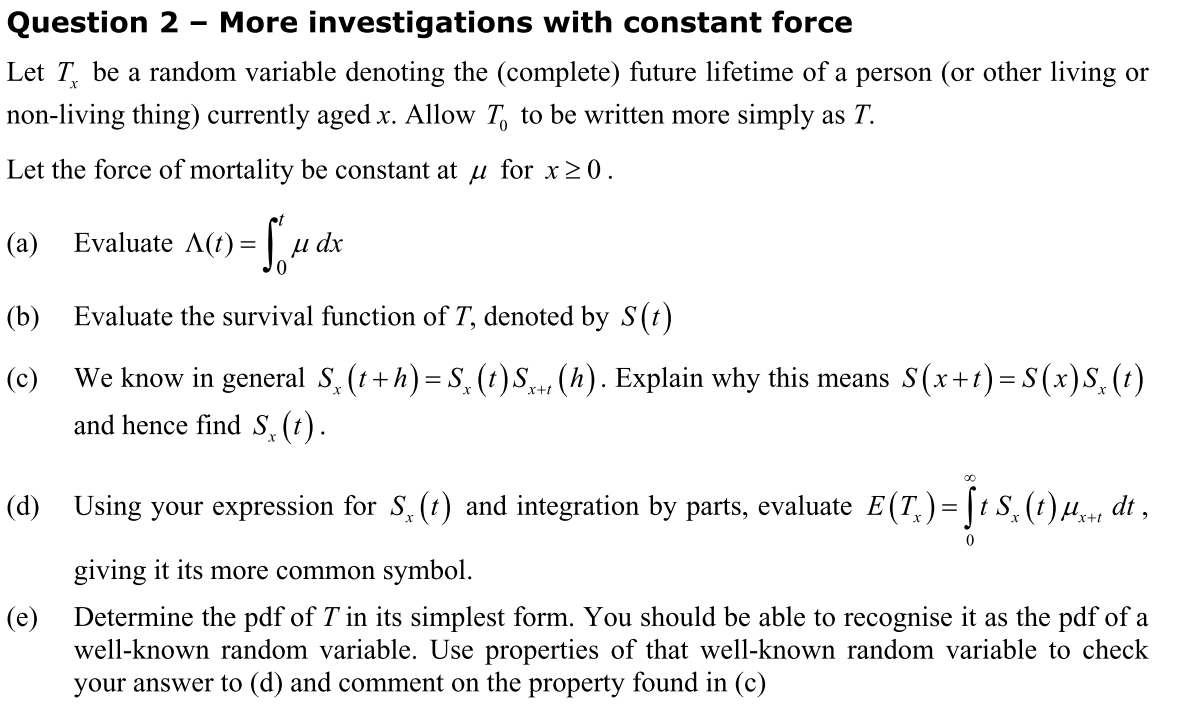

Questions don't refer directly to the AM92 tables, but rather manipulate hazard/survival functions

Consider the following

TypeError: unsupported operand type(s) for ** or pow(): 'function' and 'int'